In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Downloading and preparing dataset

In [ ]:
_URL = 'https://github.com/adamkapus/flower-recognition/archive/refs/heads/master.zip'
zip_file = tf.keras.utils.get_file('flowersdataset', origin=_URL, extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower-recognition-master','OxforDataSet')

63791104/Unknown - 2s 0us/step

In [ ]:
classes = ['bluebell', 'buttercup', 'colts foot', 'cowslip','crocus', 'daffodil', 'daisy', 'dandelion', 'fritillary','iris', 'lily valley', 'pansy', 'snowdrop', 'sunflower', 'tiger lily',  'tulip',   'windflower',]

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

bluebell: 80 Images
buttercup: 80 Images
colts foot: 80 Images
cowslip: 80 Images
crocus: 80 Images
daffodil: 80 Images
daisy: 80 Images
dandelion: 80 Images
fritillary: 80 Images
iris: 80 Images
lily valley: 80 Images
pansy: 80 Images
snowdrop: 80 Images
sunflower: 80 Images
tiger lily: 80 Images
tulip: 80 Images
windflower: 80 Images


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
batch_size = 100
IMG_SHAPE = 224 

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 1088 images belonging to 17 classes.


Viewing augmented images

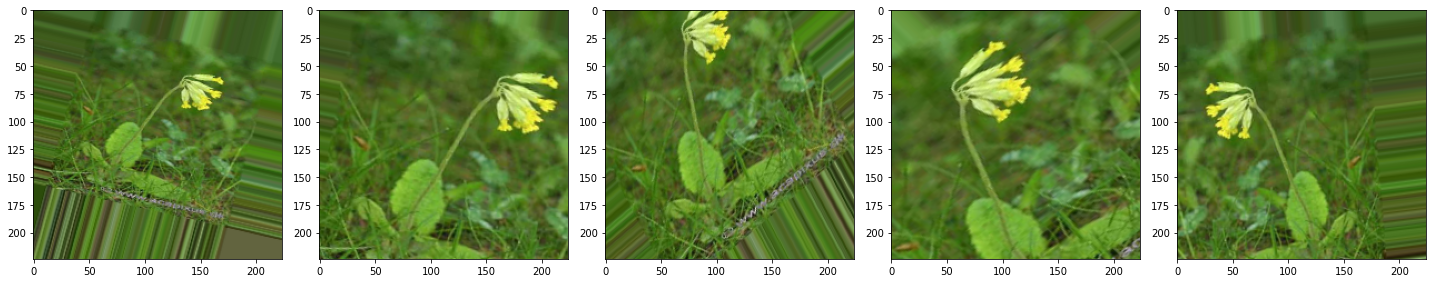

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Training

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 272 images belonging to 17 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 30s 2s/step - loss: 3.2460 - accuracy: 0.0846 - val_loss: 2.7375 - val_accuracy: 0.1176
Epoch 2/50
11/11 [==============================] - 17s 2s/step - loss: 2.6177 - accuracy: 0.1342 - val_loss: 2.4615 - val_accuracy: 0.1434
Epoch 3/50
11/11 [==============================] - 17s 2s/step - loss: 2.4072 - accuracy: 0.1976 - val_loss: 2.1412 - val_accuracy: 0.2868
Epoch 4/50
11/11 [==============================] - 17s 2s/step - loss: 2.2568 - accuracy: 0.2528 - val_loss: 1.9867 - val_accuracy: 0.3640
Epoch 5/50
11/11 [==============================] - 17s 2s/step - loss: 2.1232 - accuracy: 0.2812 - val_loss: 1.8654 - val_accuracy: 0.3971
Epoch 6/50
11/11 [==============================] - 17s 2s/step - loss: 1.9733 - accuracy: 0.3373 - val_loss: 1.7276 - val_accuracy: 0.4853
Epoch 7/50
11/11 [==============================] - 17s 2s/step - loss: 1.8431 - accuracy: 0.3419 - val_loss: 1.6611 - val_accuracy: 0.5074
Epoch 8/50
11/11 [=============

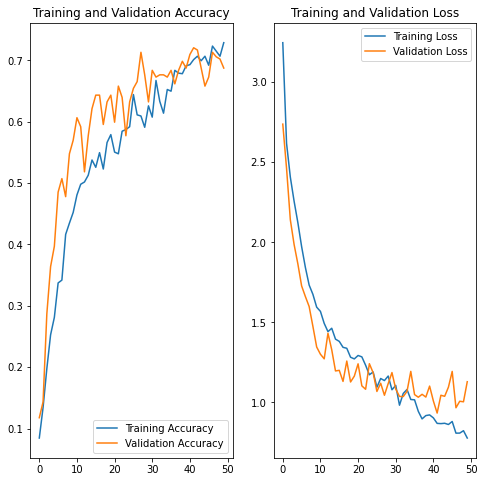

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()